In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('../src/datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

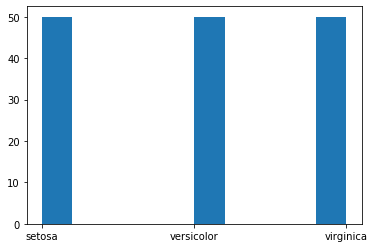

In [5]:
plt.hist(data.Species)

In [7]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [74]:
colnames=data.columns.values.tolist()
predictors=colnames[:4]
target=colnames[4]


In [26]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,False


In [76]:
data['is_train']= np.random.uniform(0,1, len(data))<=0.75

(array([ 39.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 111.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

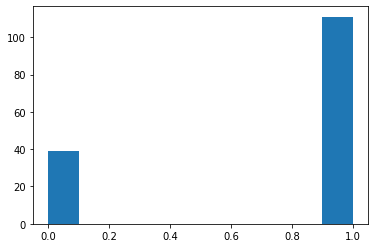

In [77]:
plt.hist(data['is_train'].astype(int))

In [79]:
train,test= data[data['is_train']==True], data[data['is_train']==False]

In [80]:
train.shape

(111, 6)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
tree= DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
# Minimo de muestras para hacer una division min_samples_split por defecto es 2. puede generar Overfitting


In [83]:
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [84]:
preds= tree.predict(test[predictors])

In [85]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,11,0,0
versicolor,0,14,0
virginica,0,1,13


# Representacion gráfica del arbol
#### Crear un archivo .DOT que exporta Python con una libreria aux de SKLEARN
#### EL archivo contienen la información necesaria del algoritbo o arbol

In [89]:
from sklearn.tree import export_graphviz

In [91]:
with open('../src/resources/iris/tree.dot', "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [94]:
import os 
from graphviz import Source



In [104]:
file = open(r'C:\Users\root\mlp\udemy\src\resources\iris\tree.dot', 'r')
text= file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.584\\nsamples = 111\\nvalue = [39, 36, 36]"] ;\n1 [label="entropy = 0.0\\nsamples = 39\\nvalue = [39, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 72\\nvalue = [0, 36, 36]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.477\\nsamples = 39\\nvalue = [0, 35, 4]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.191\\nsamples = 34\\nvalue = [0, 33, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 33\\nvalue = [0, 33, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.971\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.196\\nsamples = 33\\nvalue = [0, 1, 32]"] ;\n2 -> 8 ;\n9 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n8 ->

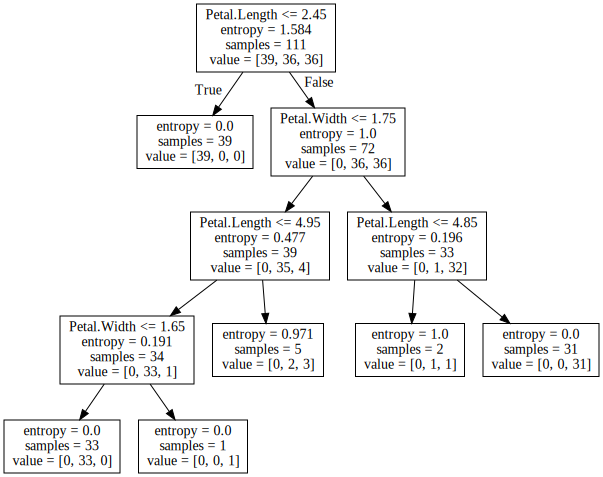

In [105]:
Source(text)

## CrossValidation para la PODA

In [108]:
X=data[predictors]
Y=data[target]

In [134]:
tree= DecisionTreeClassifier(criterion="entropy", min_samples_split=20, max_depth=10
                             , random_state=99)
# Minimo de muestras para hacer una division min_samples_split por defecto es 2. puede generar Overfitting
tree.fit(X,Y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [136]:
from sklearn.model_selection import KFold

In [137]:
cv=KFold( n_splits=10, shuffle=True, random_state=1)

In [138]:
from sklearn.model_selection import cross_val_score

In [139]:
# Obtener rendimiento del Arbo
score= np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1))
score

0.9333333333333333

In [140]:
scores=cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [149]:
print(predictors)
for i in range(1,20):
    tree= DecisionTreeClassifier(criterion="entropy", min_samples_split=20, max_depth=i , random_state=99)
    tree.fit(X,Y)
    cv=KFold( n_splits=10, shuffle=True, random_state=1)
    scores= cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
    score= np.mean(scores)
    #print("Scores para   i=  ",i , " Es DE: ", score , " .")
    print("   ", tree.feature_importances_)
    



['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
    [0. 0. 1. 0.]
    [0.         0.         0.66620285 0.33379715]
    [0.         0.         0.68976981 0.31023019]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]
    [0.         0.         0.66869158 0.33130842]


In [146]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']